<a href="https://colab.research.google.com/github/taciomattos/taciomattos/blob/main/Code%5CCancer_decision_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cardiac disease decision three

Problema: Classificar a propensão de desenvolver  doença cardíada baseado em dados da população de Framingham

In [ ]:
# importação das bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing, model_selection, metrics
from sklearn.utils import class_weight
from sklearn import tree
from sklearn import preprocessing, model_selection
from sklearn import metrics


In [ ]:
#Carregando os dados

df_saude = pd.read_csv('framingham.csv')
target_col = 'TenYearCHD'


df_saude['target_label'] = np.where(df_saude['TenYearCHD'] == 0, 'Não_Propenso', 'Propenso')
    
label_map = df_saude[['TenYearCHD', 'target_label']].drop_duplicates()

drop_cols = ['target_label']
df_saude.drop(drop_cols, axis=1, inplace=True)

#Estudo da base

Estudar a base, entender o problema, interpretar os dados
A base contém dados médicos da população de framingham - EUA.
Definção do problema: Classificar se uma pessoa é propensa ou não propensa a ter doença cardíaca

In [ ]:
# quantidade de linas e colunas

df_saude.shape

(4238, 16)

In [ ]:
# conhecendo os primeiros dados

df_saude.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# conhecendo os últimos dados

df_saude.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
# conhecendo as colunas e tipo
df_saude.info()

# Não existem dados do tipo texto. Não será necessário realizar conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


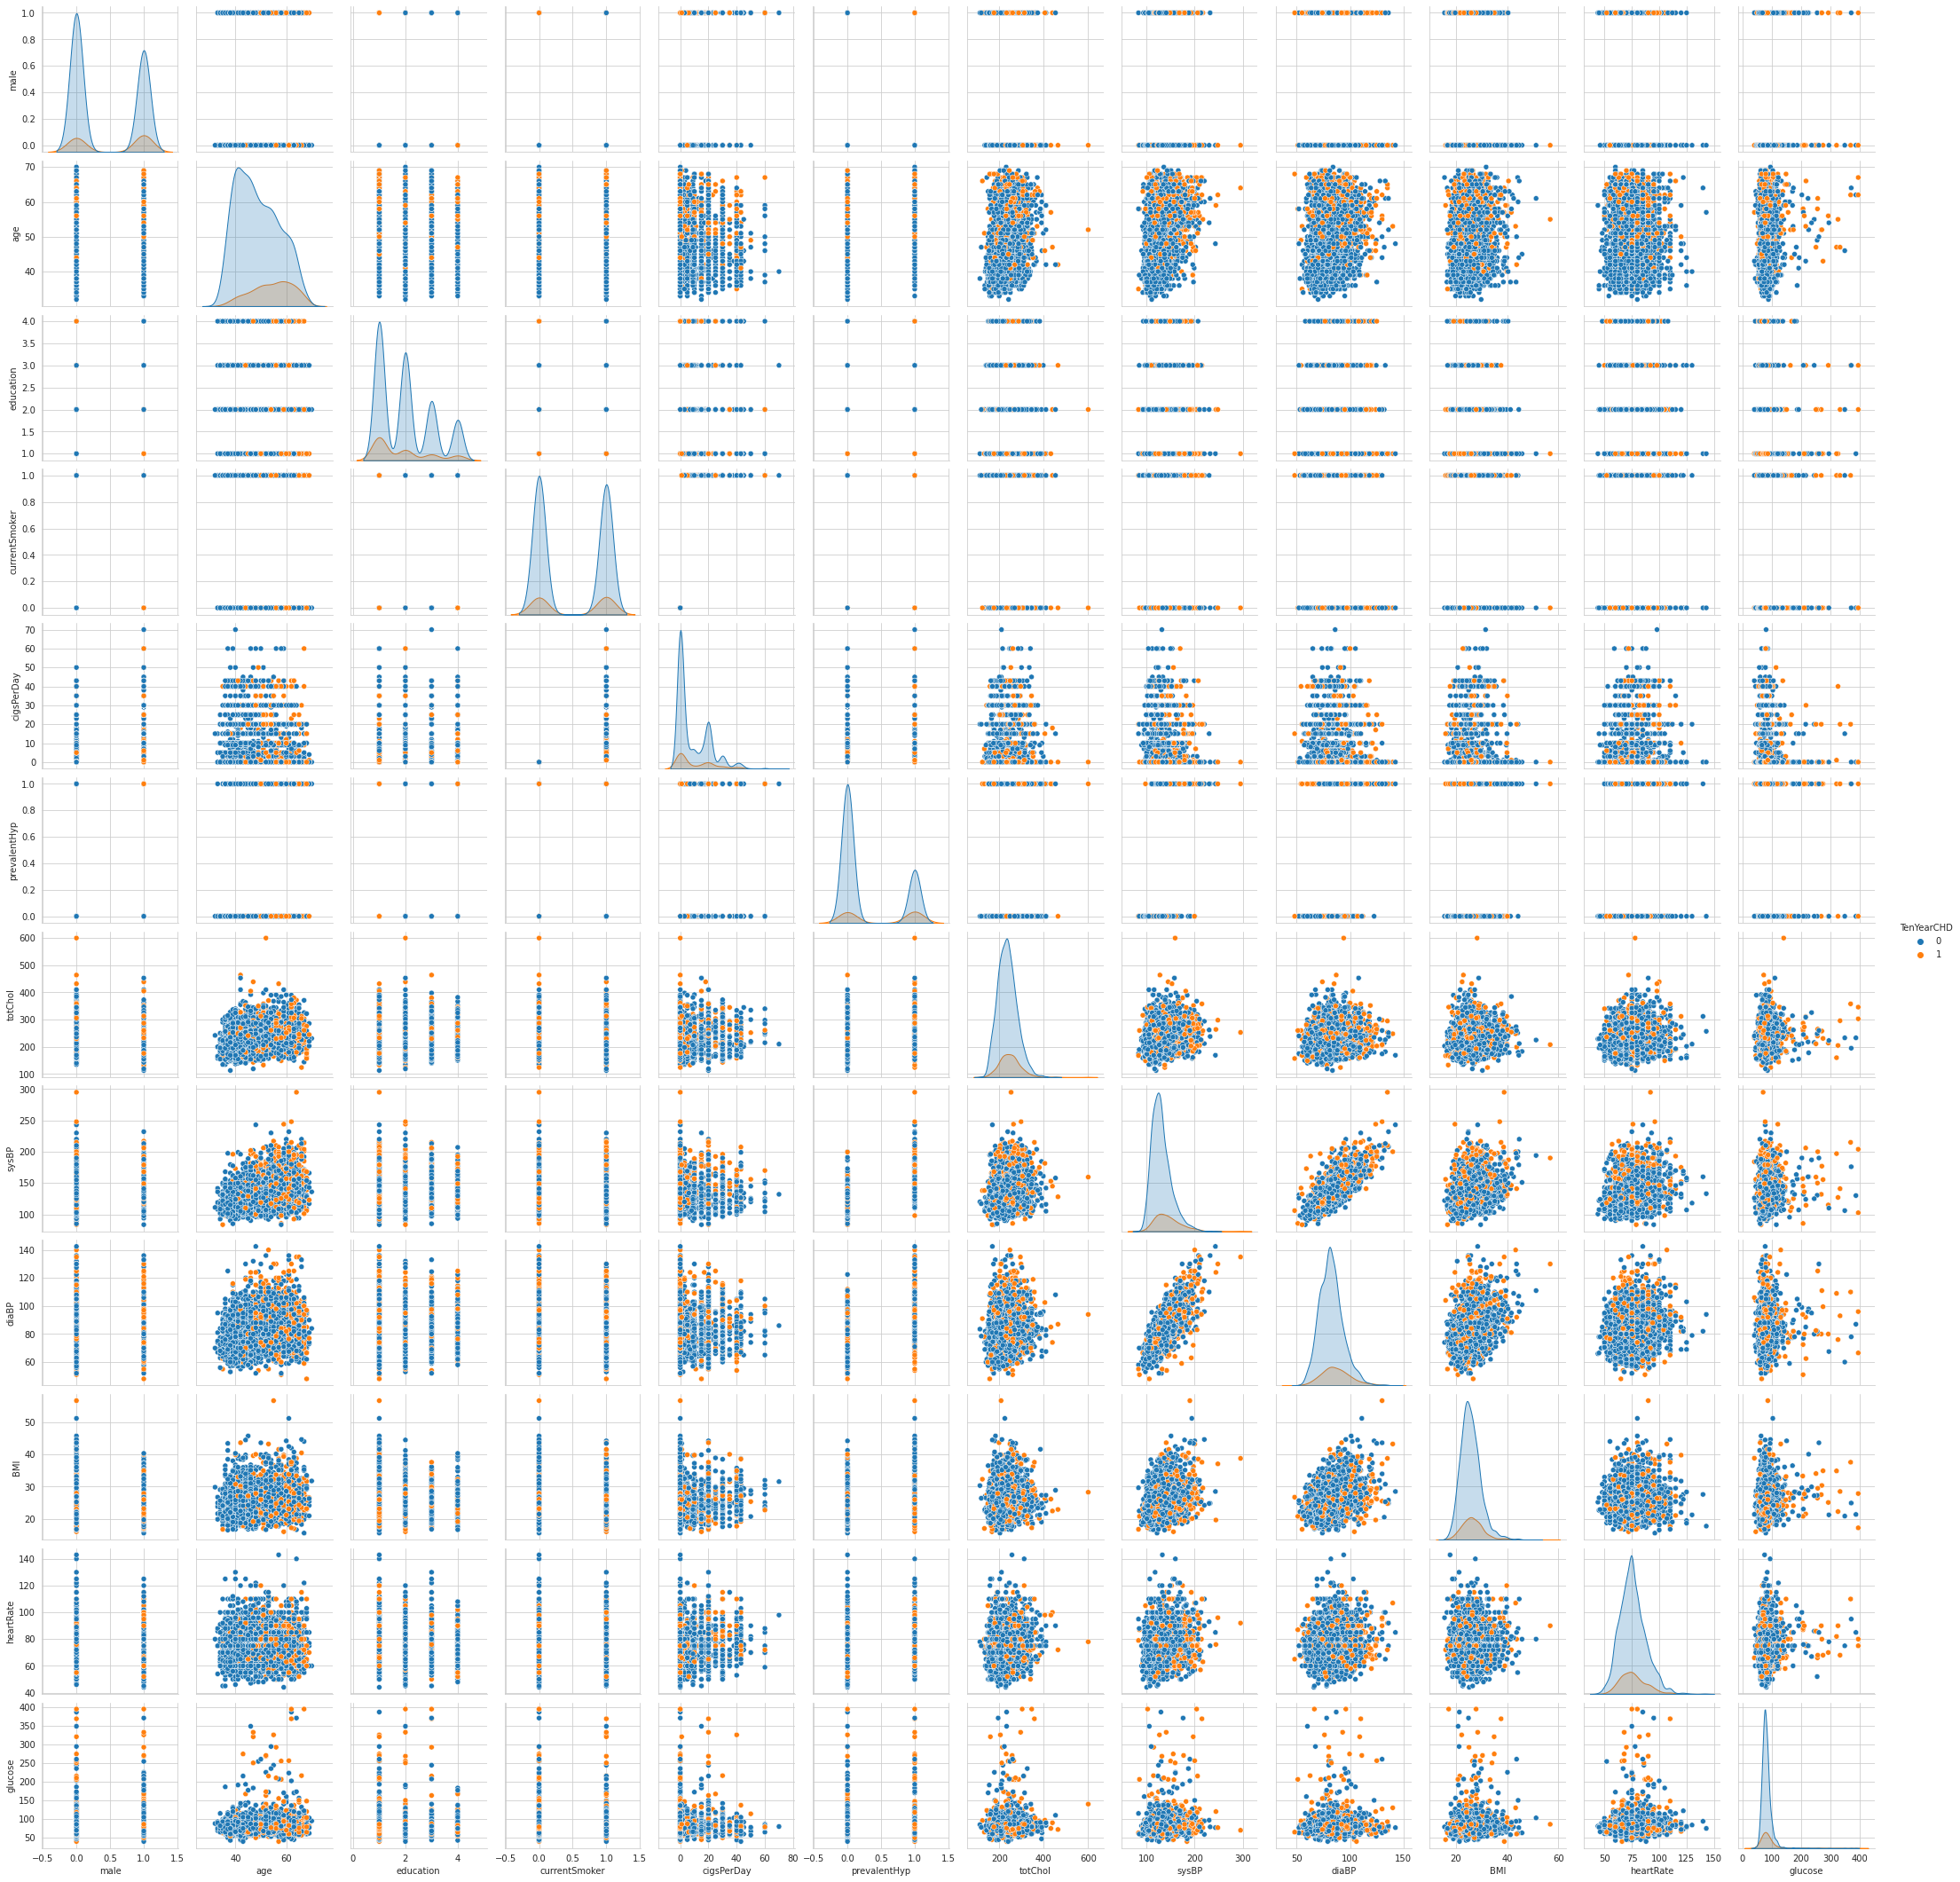

In [ ]:
# Estudando a distribuição dos dados comparando com a variável target
sns.pairplot(df_saude, hue=target_col)
plt.ticklabel_format(style='plain', axis='y')

#Verificando as medianas e outliers
Histogramas

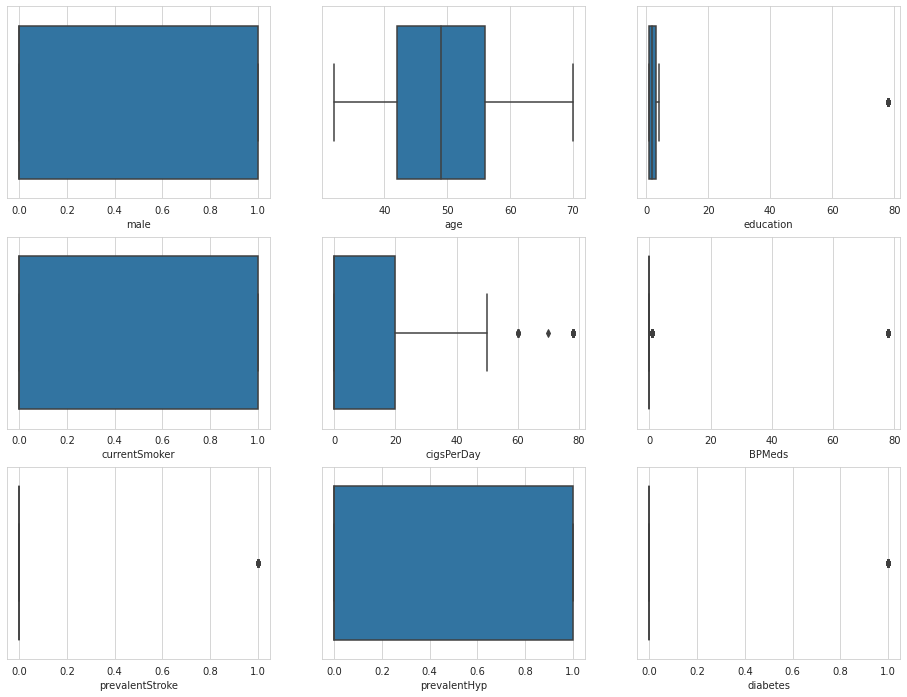

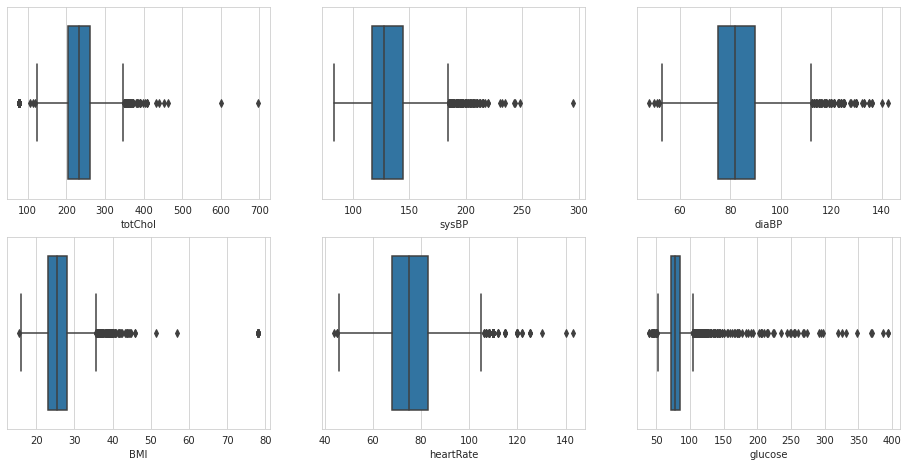

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='male', data=df_saude)
plt.subplot(3,3,2)
sns.boxplot(x='age', data=df_saude)
plt.subplot(3,3,3)
sns.boxplot(x='education', data=df_saude)
plt.subplot(3,3,4)
sns.boxplot(x='currentSmoker', data=df_saude)
plt.subplot(3,3,5)
sns.boxplot(x='cigsPerDay', data=df_saude)
plt.subplot(3,3,6)
sns.boxplot(x='BPMeds', data=df_saude)
plt.subplot(3,3,7)
sns.boxplot(x='prevalentStroke', data=df_saude)
plt.subplot(3,3,8)
sns.boxplot(x='prevalentHyp', data=df_saude)
plt.subplot(3,3,9)
sns.boxplot(x='diabetes', data=df_saude)
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='totChol', data=df_saude)
plt.subplot(3,3,2)
sns.boxplot(x='sysBP', data=df_saude)
plt.subplot(3,3,3)
sns.boxplot(x='diaBP', data=df_saude)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=df_saude)
plt.subplot(3,3,5)
sns.boxplot(x='heartRate', data=df_saude)
plt.subplot(3,3,6)
sns.boxplot(x='glucose', data=df_saude)

#Higienizando os dados

In [ ]:
# verificando a existência de valores nulos
df_saude.isnull().sum().sort_values(ascending=False)

# Conclusão: Percebemos que a base é desbalanceada e contém valores nulos

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [ ]:
#preencher  dados faltantes com a mediana de cada coluna
cols = ('glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate')

for  clname in cols:
  # extrair a mediana
   valmediana= df_saude[clname].median()

   # preencher a coluna LotFrontage com a mediana
   df_saude.fillna(valmediana, inplace=True)

# checar se há valor ausente após o tratamento
df_saude.isnull().sum().sort_values(ascending=False)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#Treinando o modelo

In [ ]:
# Treinamento do modelo 
Y = df_saude[target_col]
X = df_saude.drop(target_col, axis=1)

# Utilizar class_weights = class_weight.compute_class_weight('balanced' 
#e comparar com o nivelamento dos dados

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[target_col] = ytrain
df_test[target_col] = ytest


model_saude = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model_saude.fit(xtrain, ytrain)      
df_train['decision'] = model_saude.predict(xtrain)
df_test['decision']  = model_saude.predict(xtest)
df_train['probability'] = model_saude.predict_proba(xtrain)[:,1]
df_test['probability']  = model_saude

df_saude = pd.concat((df_train, df_test), axis=0)

#Métricas

#Matriz de confusão

[Text(0, 0.5, 'Não_Propenso'), Text(0, 1.5, 'Propenso')]

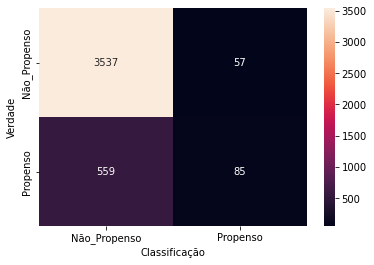

In [ ]:
cm = metrics.confusion_matrix(df_saude[target_col],
                              df_saude['decision'])

sns.heatmap(cm, annot=True, fmt = '.0f')

plt.xlabel('Classificação')
plt.ylabel('Verdade')

plt.gca().set_xticklabels(label_map.target_label.values)
plt.gca().set_yticklabels(label_map.target_label.values)

#Precisão, sensibilidade, acurácia e F1 Score



In [ ]:
print('Árvore de decisão')
print(metrics.classification_report(df_saude[target_col],
                              df_saude['decision'],
                              target_names =label_map.target_label))


Árvore de decisão
              precision    recall  f1-score   support

Não_Propenso       0.86      0.98      0.92      3594
    Propenso       0.60      0.13      0.22       644

    accuracy                           0.85      4238
   macro avg       0.73      0.56      0.57      4238
weighted avg       0.82      0.85      0.81      4238

